## Entrega 6. Ejercicio FST
#### Jhon Steeven Cabanilla Alvarado

1. El autómata N que inserte puntos decimales en un entero (representado como cadena) para facilitar su lectura, dividiendo los dígitos en grupos de tres de la manera estándar. Por ejemplo, "103" → "103"  y  "-14321060" → "-14.321.060".  Para simplificar el autómata, se puede suponer que el símbolo 'd' representa un dígito cualquiera.

In [15]:
from pynini import *

#Funcion que define los alfabetos a partir del parametro @param: word
def tabla_de_simbolos(word):
    alfabeto = list(word)
    ts = SymbolTable()
    ts.add_symbol('ϵ', 0)
    for simbolo in alfabeto:
        ts.add_symbol(simbolo, ord(simbolo))
    return ts

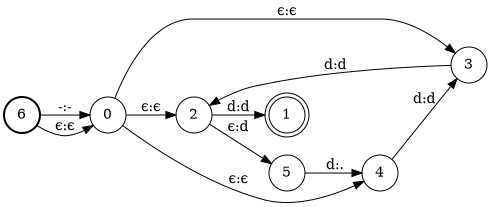

In [16]:
sym = tabla_de_simbolos('d.-')

#Declaramos el automata y los distintos estados
N = Fst()
s0 = N.add_state()
s1 = N.add_state()
s2 = N.add_state()
s3 = N.add_state()
s4 = N.add_state()
s5 = N.add_state()
s6 = N.add_state()

#Relaciones entre estados mediante: Arc(ilabel, olabel, peso, estado_destino)
N.add_arc( s0, Arc( 0, 0, 0, s2) )
N.add_arc( s0, Arc( 0, 0, 0, s3) )
N.add_arc( s0, Arc( 0, 0, 0, s4) )
N.add_arc( s2, Arc( ord('d'), ord('d'), 0, s1) )
N.add_arc( s2, Arc( 0, ord('d'), 0, s5) )
N.add_arc(s3, Arc(ord('d'), ord('d'), 0, s2))
N.add_arc(s4, Arc(ord('d'), ord('d'), 0, s3))
N.add_arc(s5, Arc(ord('d'), ord('.'), 0, s4))
N.add_arc(s6, Arc(ord('-'), ord('-'), 0, s0))
N.add_arc( s6, Arc( 0, 0, 0, s0) )


# Definimos estado/s inicial/es y final/es
N.set_start( s6)
N.set_final( s1)

# Mostramos automata
N.set_input_symbols(sym)
N.set_output_symbols(sym)

In [17]:
sp = list(shortestpath("-dddddddd" @ N, nshortest = 1).paths().ostrings())
print(sp)

['-dd.ddd.ddd']


2. El autómata R que mapee la cadena de entrada "risa" en su onomatopeya, representada por el conjunto infinito (ja)+.  Por ejemplo, "risa" → "ja", "risa" → "jaja", "risa" → "jajaja",...

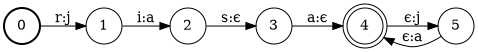

In [18]:
sym = tabla_de_simbolos('risaj')

#Declaramos el automata y los distintos estados
R = Fst() 
q0 = R.add_state()
q1 = R.add_state()
q2 = R.add_state()
q3 = R.add_state()
q4 = R.add_state()
q5 = R.add_state()

#Relaciones entre estados mediante: Arc(ilabel, olabel, peso, estado_destino)
R.add_arc( q0, Arc(ord('r'), ord('j'), 0, q1) )
R.add_arc( q1, Arc(ord('i'), ord('a'), 0, q2) )
R.add_arc( q2, Arc(ord('s'), 0, 0, q3) )
R.add_arc( q3, Arc(ord('a'), 0, 0, q4) )
R.add_arc( q4, Arc(0, ord('j'), 0, q5) )
R.add_arc( q5, Arc(0, ord('a'), 0, q4) )

#Definimos estado/s inicial/es y final/es
R.set_start(q0)
R.set_final(q4)

# Mostramos automata
R.set_input_symbols(sym)
R.set_output_symbols(sym)

In [19]:
sp = list(shortestpath("risa" @ R, nshortest = 5).paths().ostrings())
print(sp)

['ja', 'jajajaja', 'jajajajaja', 'jajaja', 'jaja']


3. El autómata C que permita encierre cada ocurrencia de "ab" entre corchetes, suponiendo que las cadenas de entrada están formadas por el alfabeto {a,b,c,d}, . Por ejemplo, "dcbaaacd" → "dcbaaacd", "caaabbabc" → "caa{ab}b{ab}c".

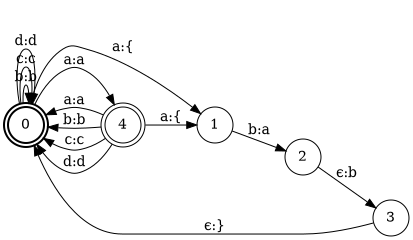

In [20]:
sym = tabla_de_simbolos('abcd{}')

#Declaramos el automata y los distintos estados
C = Fst()
q0 = C.add_state()
q1 = C.add_state()
q2 = C.add_state()
q3 = C.add_state()
q4 = C.add_state()

#Relaciones entre estados mediante: Arc(ilabel, olabel, peso, estado_destino)
C.add_arc( q0, Arc(ord('b'), ord('b'), 0, q0) )
C.add_arc( q0, Arc(ord('c'), ord('c'), 0, q0) )
C.add_arc( q0, Arc(ord('d'), ord('d'), 0, q0) )

C.add_arc( q0, Arc(ord('a'), ord('{'), 0, q1) )
C.add_arc( q0, Arc(ord('a'), ord('a'), 0, q4) )

C.add_arc( q4, Arc(ord('a'), ord('a'), 0, q0) )
C.add_arc( q4, Arc(ord('a'), ord('{'), 0, q1) )
C.add_arc( q4, Arc(ord('b'), ord('b'), 0, q0) )
C.add_arc( q4, Arc(ord('c'), ord('c'), 0, q0) )
C.add_arc( q4, Arc(ord('d'), ord('d'), 0, q0) )

C.add_arc( q1, Arc(ord('b'), ord('a'), 0, q2) )
C.add_arc( q2, Arc(0, ord('b'), 0, q3) )
C.add_arc( q3, Arc(0, ord('}'), 0, q0) )

#Definimos estado/s inicial/es y final/es
C.set_start(q0)
C.set_final(q0)
C.set_final(q4)

# Mostramos automata
C.set_input_symbols(sym)
C.set_output_symbols(sym)

In [24]:
sp = list(shortestpath("aaaaaaaaabababdadbabadaccabab" @ C, nshortest = 1).paths().ostrings())
print(sp)

['aaaaaaaa{ab}{ab}{ab}dadb{ab}adacc{ab}{ab}']
